In [1]:
from sklearn import datasets
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

In [2]:
iris = datasets.load_iris()

In [3]:
x, y = iris['data'], iris['target']

In [4]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [5]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [6]:
df = pd.DataFrame(data= np.c_[x, y], columns= ['sepal_length','sepal_width',
                                              'petal_length','petal_width',
                                              'label'])
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [7]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=4)

In [8]:
x_train.shape

(112, 4)

In [9]:
y_train.shape

(112,)

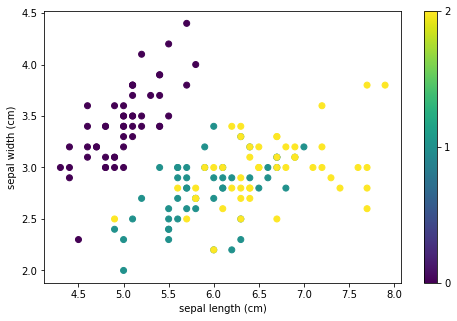

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.scatter(x[:, 0], x[:, 1], c=y)
plt.colorbar(ticks=[0, 1, 2])
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])

plt.show()

# LogisticRegression
https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html

In [11]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(max_iter=200)
lr.fit(x_train, y_train)

lr.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [12]:
print("coef:", lr.coef_)
print("intercept:", lr.intercept_)

coef: [[-0.4353972   0.8816665  -2.33403779 -0.98241168]
 [ 0.62491656 -0.29314426 -0.23694588 -0.91142605]
 [-0.18951936 -0.58852224  2.57098368  1.89383773]]
intercept: [  9.30227149   1.58949905 -10.89177054]


In [13]:
lr.predict_proba(x_test)

array([[2.00836817e-05, 4.33238096e-02, 9.56656107e-01],
       [9.27365631e-01, 7.26341318e-02, 2.37463567e-07],
       [2.40609157e-06, 4.21595400e-02, 9.57838054e-01],
       [1.54202152e-07, 7.64315238e-03, 9.92356693e-01],
       [1.44519406e-06, 3.05849573e-02, 9.69413598e-01],
       [6.62817733e-03, 7.93839106e-01, 1.99532716e-01],
       [6.41135603e-04, 3.44244622e-01, 6.55114243e-01],
       [9.76603350e-01, 2.33966377e-02, 1.23315527e-08],
       [9.51449598e-01, 4.85501415e-02, 2.60472094e-07],
       [7.32693046e-04, 4.77399120e-01, 5.21868187e-01],
       [9.28646885e-01, 7.13528168e-02, 2.98062824e-07],
       [9.62603858e-01, 3.73959783e-02, 1.63361677e-07],
       [9.61009614e-01, 3.89903030e-02, 8.25789933e-08],
       [3.79016809e-03, 7.62278910e-01, 2.33930922e-01],
       [3.47548291e-04, 1.43246688e-01, 8.56405763e-01],
       [9.52542948e-01, 4.74568943e-02, 1.57685432e-07],
       [6.53198966e-02, 9.24523837e-01, 1.01562665e-02],
       [9.76983838e-01, 2.30161

In [14]:
print("train score:", lr.score(x_train, y_train))
print("test score:", lr.score(x_test, y_test))

train score: 0.9910714285714286
test score: 0.9736842105263158


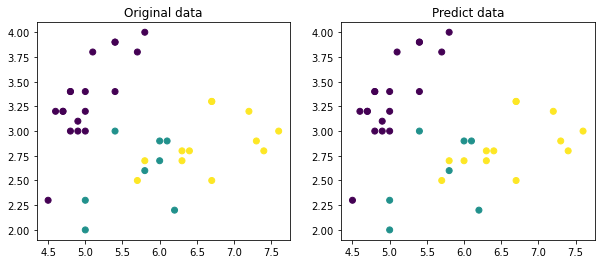

In [15]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('Predict data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=lr.predict(x_test))

plt.show()

# KNN
https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

In [16]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3, weights='distance')
knn.fit(x_train, y_train)

knn.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [17]:
print("train score:", knn.score(x_train, y_train))
print("test score:", knn.score(x_test, y_test))

train score: 1.0
test score: 0.9736842105263158


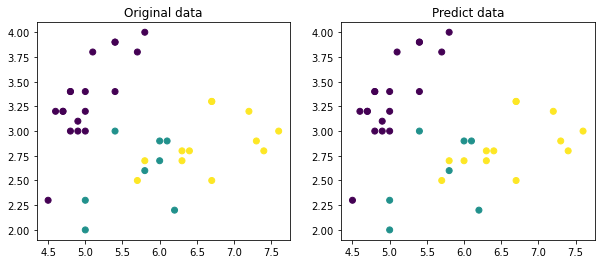

In [18]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('Predict data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=knn.predict(x_test))

plt.show()

# SVM
https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm

In [19]:
from sklearn import svm

svc = svm.LinearSVC()
svc.fit(x_train, y_train)

svc.predict(x_test)  

C:\Users\joyle\anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 1, 2, 2, 1])

In [20]:
print("train score:", svc.score(x_train, y_train))
print("test score:", svc.score(x_test, y_test))

train score: 0.9732142857142857
test score: 0.9210526315789473


In [21]:
svc = svm.SVC(kernel='poly')
svc.fit(x_train, y_train)
svc.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [22]:
print("train score:", svc.score(x_train, y_train))
print("test score:", svc.score(x_test, y_test))

train score: 0.9821428571428571
test score: 0.9736842105263158


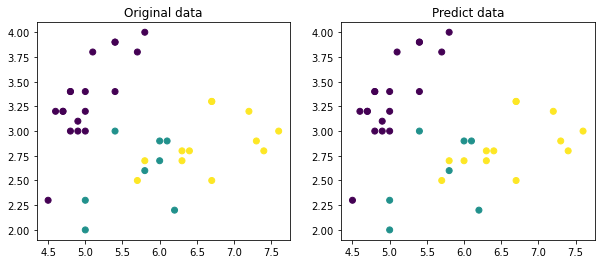

In [23]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('Predict data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=svc.predict(x_test))

plt.show()

## 繪圖

In [24]:
df

,sepal_length,sepal_width,petal_length,petal_width,label
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [25]:
# setosa, versicolor, virginica
setosa_l = df[df['label']==0]['petal_length'].values
setosa_w = df[df['label']==0]['petal_width'].values

versicolor_l = df[df['label']==1]['petal_length'].values
versicolor_w = df[df['label']==1]['petal_width'].values

virginica_l = df[df['label']==2]['petal_length'].values
virginica_w = df[df['label']==2]['petal_width'].values

In [26]:
setosa = np.c_[setosa_l, setosa_w]
versicolor = np.c_[versicolor_l, versicolor_w]
virginica = np.c_[virginica_l, virginica_w]

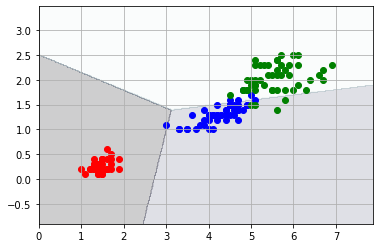

In [27]:
X0 = np.r_[setosa_l, versicolor_l, virginica_l]
X1 = np.r_[setosa_w, versicolor_w, virginica_w]
Y = np.r_[np.zeros(len(setosa_l)),
          np.ones(len(versicolor_l)),
          np.ones(len(virginica_l))*2]


X0_min, X0_max = X0.min()-1, X0.max()+1
X1_min, X1_max = X1.min()-1, X1.max()+1
grid = 0.02
x0, x1 = np.meshgrid(np.arange(X0_min, X0_max, grid), 
                     np.arange(X1_min, X1_max, grid))

svc = svm.LinearSVC()
svc.fit(np.c_[X0, X1], Y)
preds = svc.predict(np.c_[x0.ravel(), x1.ravel()])
preds = preds.reshape(x0.shape)

plt.contourf(x0, x1, preds, cmap=plt.cm.bone, alpha=0.2)
plt.autoscale()
plt.grid()
plt.scatter(setosa_l, setosa_w, color='red')
plt.scatter(versicolor_l, versicolor_w, color='blue')
plt.scatter(virginica_l, virginica_w, color='green')
plt.show()

# DecisionTree
https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

In [28]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)
decision_tree.fit(x_train, y_train)

decision_tree.predict(x_test) 

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [29]:
print("train score:", decision_tree.score(x_train, y_train))
print("test score:", decision_tree.score(x_test, y_test))

train score: 0.9732142857142857
test score: 0.9736842105263158


In [30]:
# 每個特徵的重要程度
decision_tree.feature_importances_

array([0.        , 0.        , 0.67124791, 0.32875209])

## pydotplus 安裝
https://mlln.cn/2018/09/21/pydotplus%E5%AE%89%E8%A3%85%E5%92%8C%E5%9F%BA%E6%9C%AC%E5%85%A5%E9%97%A8/

In [31]:
import pydotplus
from sklearn.tree import export_graphviz

dot_data = export_graphviz(decision_tree)
graph=pydotplus.graph_from_dot_data(dot_data)
graph.write_pdf('decision_tree.pdf')

True

# RandomForest
https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html

In [32]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=5)
rf.fit(x_train, y_train)

rf.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 1, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [33]:
print("train score:", rf.score(x_train, y_train))
print("test score:", rf.score(x_test, y_test))

train score: 0.9821428571428571
test score: 0.9473684210526315


In [34]:
# 每個特徵的重要程度
rf.feature_importances_

array([0.13033889, 0.04808547, 0.33379096, 0.48778468])

# XGBoost
https://xgboost.readthedocs.io/en/stable/python/python_api.html#xgboost.XGBClassifier

In [19]:
from xgboost import XGBClassifier

xgb_model = XGBClassifier(n_estimators = 100, eval_metric='mlogloss')
xgb_model.fit(x_train, y_train)

xgb_model.predict(x_test)

array([2, 0, 2, 2, 2, 1, 2, 0, 0, 2, 0, 0, 0, 1, 2, 0, 1, 0, 0, 2, 0, 2,
       1, 0, 0, 0, 0, 0, 0, 2, 1, 0, 2, 0, 1, 2, 2, 1])

In [15]:
print("train score:", xgb_model.score(x_train, y_train))
print("test score:", xgb_model.score(x_test, y_test))

train score: 1.0
test score: 0.9736842105263158


In [16]:
# 每個特徵的重要程度
xgb_model.feature_importances_

array([0.01822872, 0.02532505, 0.58279955, 0.37364668], dtype=float32)

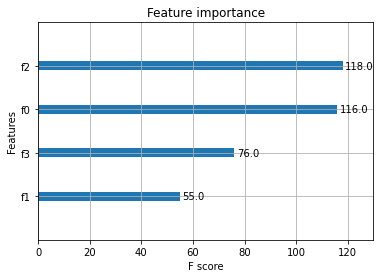

In [17]:
from xgboost import plot_importance

plot_importance(xgb_model)

# KMeans
https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html

In [11]:
from sklearn.cluster import KMeans
from sklearn import metrics

kmeans = KMeans(n_clusters = 3)
kmeans.fit(x_train)
cluster_labels = kmeans.labels_

score = metrics.silhouette_score(x_train, cluster_labels)
print("train score:", score)

train score: 0.5307917104410693


In [12]:
# sum of the squared errors, SSE
kmeans.inertia_

58.98645833333334

In [13]:
print("test score:", metrics.silhouette_score(x_test, kmeans.predict(x_test)))

test score: 0.621206243204307


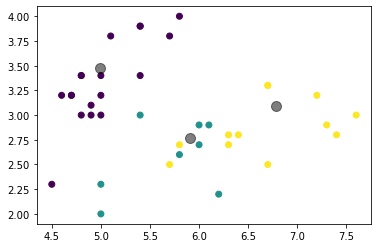

In [14]:
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

# 畫出聚類中心
centers = kmeans.cluster_centers_
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

plt.show()

# PCA
https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html

In [15]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2)
x_pca = pca.fit_transform(x_train)

print("original shape:   ", x_train.shape)
print("transformed shape:", x_pca.shape)

original shape:    (112, 4)
transformed shape: (112, 2)


In [16]:
# 降維後的主成分方差值佔總方差的比例
print(pca.explained_variance_ratio_)

[0.92096081 0.0538706 ]


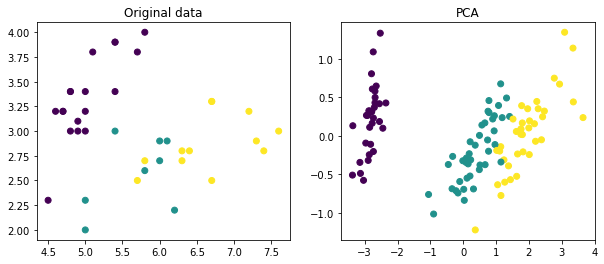

In [17]:
plt.figure(figsize=(10, 4))

plt.subplot(121)
plt.title('Original data')
plt.scatter(x_test[:, 0], x_test[:, 1], c=y_test)

plt.subplot(122)
plt.title('PCA')
plt.scatter(x_pca[:, 0], x_pca[:, 1], c=y_train)

plt.show()